In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import requests
from matplotlib.backends.backend_pdf import PdfPages
import calendar, time
from datetime import datetime

## dv_lees

In [2]:
# the URL is just a long string
site_num = '09380000'

dv_url = 'http://waterservices.usgs.gov/nwis/dv/?format=rdb'
dv_url += '&sites={0}'.format(site_num)
#dv_url += '&startDT=2010-01-01'
dv_url += '&startDT=1919-01-01'
#dv_url += '&endDT=2018-01-17'
dv_url += '&parameterCd=00060'
print(dv_url)


http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=09380000&startDT=1919-01-01&parameterCd=00060


## iv_lees

In [3]:
iv_url = dv_url.replace('dv','iv')

In [4]:
iv_url

'http://waterservices.usgs.gov/nwis/iv/?format=rdb&sites=09380000&startDT=1919-01-01&parameterCd=00060'

## Lake Powell Data 
https://www.usbr.gov/rsvrWater/HistoricalApp.html;jsessionid=uHXuCl5hlSSmcpIHT8x4_FKk9i78u3zUxNrQtOLp.lxwf01:prod_rsvrwater_ha

In [5]:
powell = pd.read_excel('powell_munged.xlsx')

In [6]:
powell.Date = pd.to_datetime(powell.Date)

In [7]:
powell.set_index('Date',drop=True, inplace=True)

In [8]:
powell.rename(columns={'Elevation (feet)':'Stage'}, inplace=True)

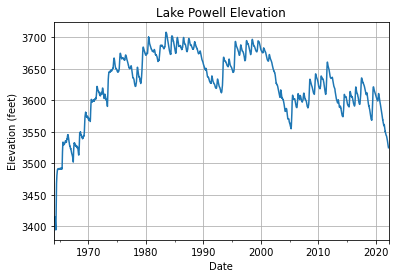

In [9]:
powell.Stage.plot()
plt.ylabel('Elevation (feet)')
plt.title('Lake Powell Elevation')
plt.grid()

In [10]:
powell.index

DatetimeIndex(['1963-12-28', '1963-12-29', '1963-12-30', '1963-12-31',
               '1964-01-01', '1964-01-02', '1964-01-03', '1964-01-04',
               '1964-01-05', '1964-01-06',
               ...
               '2022-03-06', '2022-03-07', '2022-03-08', '2022-03-09',
               '2022-03-10', '2022-03-11', '2022-03-12', '2022-03-13',
               '2022-03-14', '2022-03-15'],
              dtype='datetime64[ns]', name='Date', length=21263, freq=None)

## monthly lake mead
https://www.usbr.gov/lc/region/g4000/hourly/mead-elv.html

In [11]:
mon_mead = pd.read_csv('mead.dat', delim_whitespace=' ', na_values=-999)
mon_mead = mon_mead.melt(id_vars='Year',value_vars=mon_mead.columns[1:], var_name='Month')
mon_mead['date'] = [f'{j}-{i}' for i,j in zip(mon_mead.Year, mon_mead.Month)]
mon_mead['datetime'] = [pd.to_datetime(i) for i in mon_mead.date]
mon_mead.rename(columns={'value':'Elev'}, inplace=True)

In [12]:
mon_mead.set_index('datetime',drop=True, inplace=True)
mon_mead=mon_mead.Elev.to_frame().dropna()

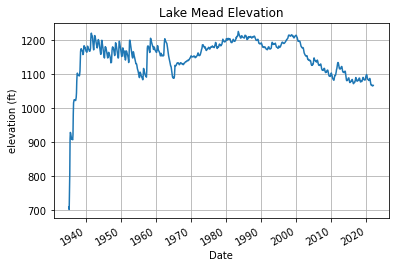

In [13]:
mon_mead.Elev.plot()
plt.title('Lake Mead Elevation')
plt.ylabel('elevation (ft)')
plt.xlabel('Date')
plt.grid('on')

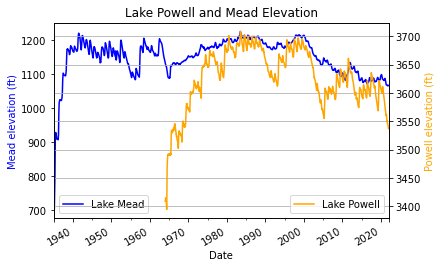

In [14]:
ax = mon_mead.Elev.plot(label='Lake Mead', color='blue')
ax2=ax.twinx()
ax.legend()
powell.Stage.plot(ax=ax2,color='orange',label='Lake Powell')
plt.title('Lake Powell and Mead Elevation')
plt.xlim([pd.to_datetime('1935'),pd.to_datetime('2022')])
ax.set_ylabel('Mead elevation (ft)', color='blue')
ax2.set_ylabel('Powell elevation (ft)', color='orange')
ax.set_xlabel('Date')
ax2.legend(loc='lower right')
plt.grid('on')

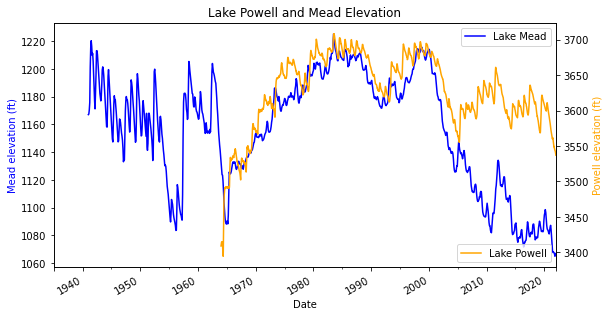

In [15]:

ax = mon_mead.loc[mon_mead.index.year>1940].Elev.plot(label='Lake Mead', color='blue', figsize=(9,5))
ax2=ax.twinx()
ax.legend()
powell.Stage.plot(ax=ax2,color='orange',label='Lake Powell')
plt.title('Lake Powell and Mead Elevation')
plt.xlim([pd.to_datetime('1935'),pd.to_datetime('2022')])
ax.set_ylabel('Mead elevation (ft)', color='blue')
ax2.set_ylabel('Powell elevation (ft)', color='orange')
ax.set_xlabel('Date')
ax2.legend(loc='lower right')


In [16]:
read_orig=False
if read_orig:
    dv_lees = pd.read_csv(dv_url, comment='#', header=[0,1], sep='\t')
    iv_lees = pd.read_csv(iv_url, comment='#', header=[0,1], sep='\t')
    for j in [iv_lees, dv_lees]:
        j.columns =  [i[0] for i in j.columns]
        j.datetime = pd.to_datetime(j.datetime)
        j.set_index('datetime',drop=True,inplace=True) 
    iv_lees = iv_lees['6128_00060'].to_frame() # reducing to one column makes this a pandas series, but
                                                    # to add columns later, we want it to stay as a DataFrame
    iv_lees.columns=['Q']
    iv_lees.head()
    iv_lees['year'] = [i.year for i in iv_lees.index]
    iv_lees['month'] = [i.month for i in iv_lees.index]
    iv_lees['day'] = [i.day for i in iv_lees.index]
    iv_lees['hour'] = [i.hour for i in iv_lees.index]
    dv_lees = dv_lees['236239_00060_00003'].to_frame() # reducing to one column makes this a pandas series, but
                                                    # to add columns later, we want it to stay as a DataFrame
    dv_lees.columns=['Q']
    dv_lees.head()
    dv_lees['year'] = [int(i.year) for i in dv_lees.index]
    dv_lees['month'] = [int(i.month) for i in dv_lees.index]
    dv_lees['day'] = [int(i.day) for i in dv_lees.index]
    #dv_lees['month'] = [calendar.month_abbr[i] for i in dv_lees.month]
    
    dv_lees.to_csv('dv_lees.csv')
    iv_lees.to_csv('iv_lees.csv')
else:
    dv_lees = pd.read_csv('dv_lees.csv', index_col=0)
    iv_lees = pd.read_csv('iv_lees.csv', index_col=0)
    dv_lees.index = pd.to_datetime(dv_lees.index) 
    iv_lees.index = pd.to_datetime(iv_lees.index) 
   

In [17]:
dv_lees

,Q,year,month,day
datetime,,,,
1921-10-01,7120,1921,10,1
1921-10-02,11800,1921,10,2
1921-10-03,7830,1921,10,3
1921-10-04,7470,1921,10,4
1921-10-05,6780,1921,10,5
...,...,...,...,...
2022-03-15,10300,2022,3,15
2022-03-16,10100,2022,3,16
2022-03-17,10200,2022,3,17


In [18]:
dv_lees_orig = dv_lees.copy()
dv_lees = dv_lees_orig.loc[dv_lees.index.year>1920].copy()

Text(0.5, 1.0, 'monthly stats for all time')

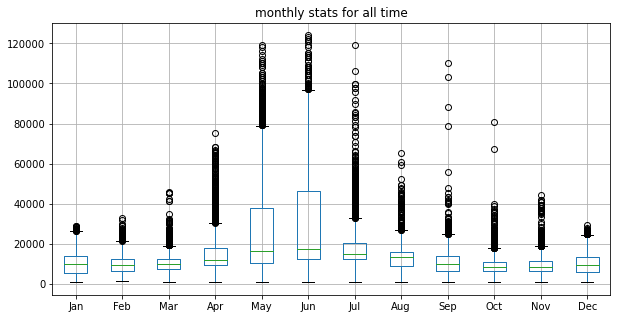

In [19]:
dg = dv_lees_orig.loc[dv_lees.index.year>1920].groupby(by='month')
dg.boxplot(column='Q', subplots=False, figsize=(10,5))
newlabels = [calendar.month_abbr[int(i._text.split(',')[0].replace('(',''))] 
             for i in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(newlabels);
plt.title('monthly stats for all time')

Text(0.5, 1.0, 'monthly stats since 1990')

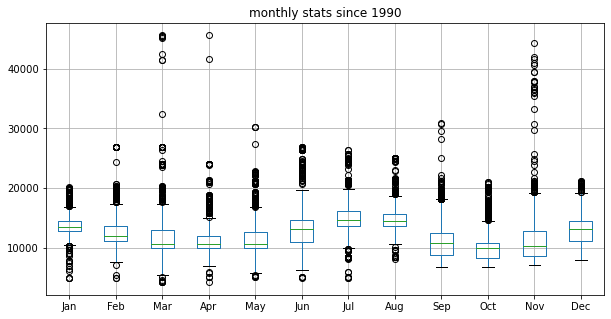

In [20]:
recent=1990
dg = dv_lees_orig.loc[dv_lees.index.year>recent].groupby(by='month')
dg.boxplot(column='Q', subplots=False, figsize=(10,5))
newlabels = [calendar.month_abbr[int(i._text.split(',')[0].replace('(',''))] 
             for i in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(newlabels);
plt.title(f'monthly stats since {recent}')

<AxesSubplot:xlabel='datetime'>

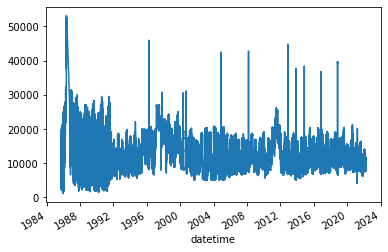

In [21]:
iv_lees.Q.plot()

## focus in on the trip

In [22]:
iv_lees_trip = iv_lees.loc[(iv_lees.index>pd.to_datetime('2022-01-25')) & 
                           (iv_lees.index<pd.to_datetime('2022-02-24'))].copy()
iv_lees_trip['date'] = [pd.to_datetime(f'{i}-{j}-2022') for i,j in zip(iv_lees_trip.month,iv_lees_trip.day)]
iv_lees_trip['date']

datetime
2022-01-25 00:15:00   2022-01-25
2022-01-25 00:30:00   2022-01-25
2022-01-25 00:45:00   2022-01-25
2022-01-25 01:00:00   2022-01-25
2022-01-25 01:15:00   2022-01-25
                         ...    
2022-02-23 22:45:00   2022-02-23
2022-02-23 23:00:00   2022-02-23
2022-02-23 23:15:00   2022-02-23
2022-02-23 23:30:00   2022-02-23
2022-02-23 23:45:00   2022-02-23
Name: date, Length: 2879, dtype: datetime64[ns]

Text(0, 0.5, 'Flow at Lees Ferry (cfs)')

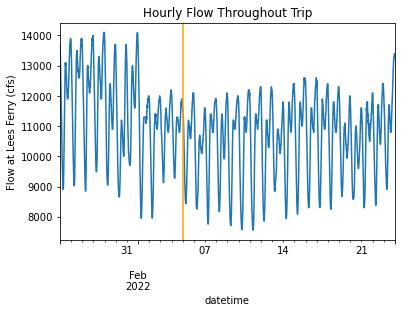

In [23]:
ax = iv_lees_trip.Q.plot()
plt.title('Hourly Flow Throughout Trip')
plt.axvline(pd.to_datetime('2-5-2022'), color='orange')
plt.ylabel('Flow at Lees Ferry (cfs)')

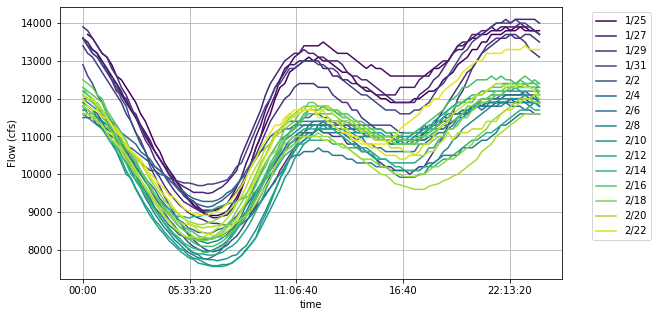

In [24]:
cmap = mpl.cm.get_cmap('viridis')
dates = []
i=0
for cn, cg in iv_lees_trip.groupby('date'):
    dates.append(f'{cn.month}/{cn.day}')
    cgplot = cg.copy()
    cgplot['time'] = [i.time() for i in cg.index]
    cgplot.set_index(cgplot.time, inplace=True)
    if i==0:
        ax = cgplot.Q.plot(label=dates[-1], color=cmap(i/30), figsize=(9,5))
    else:
        if np.mod(i,2) == 0:
            ax.plot(cgplot.index,cgplot.Q,label=dates[-1],color=cmap(i/30))
        else:
            ax.plot(cgplot.index,cgplot.Q,label=None,color=cmap(i/30))
    i += 1
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid()
plt.ylabel('Flow (cfs)');

## hourly averages over trip

Text(0, 0.5, 'Q in cfs')

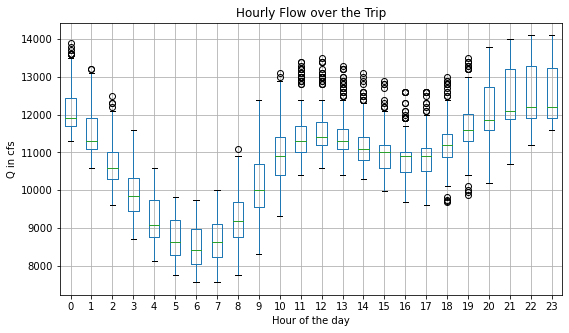

In [25]:
bg = iv_lees_trip.groupby('hour')
bg.boxplot(subplots=False, column='Q', figsize=(9,5))
newlabels = [int(i._text.split(',')[0].replace('(','')) 
             for i in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(newlabels);
plt.title('Hourly Flow over the Trip')
plt.xlabel('Hour of the day')
plt.ylabel('Q in cfs')

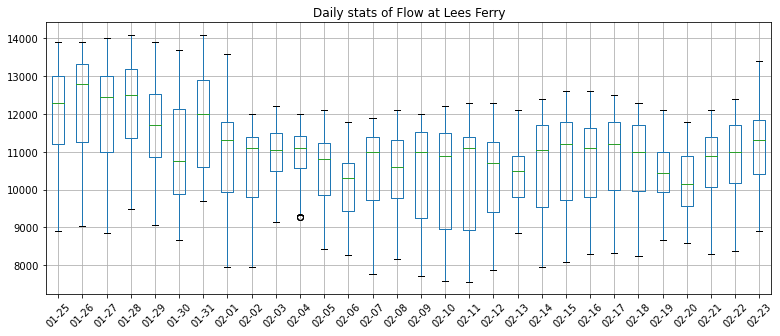

In [26]:
dg = iv_lees_trip.groupby('date')
dg.boxplot(column='Q', subplots=False, rot=45,figsize=(13,5))
plt.title('Daily stats of Flow at Lees Ferry')
newlabels = [i._text.split(' ')[0].replace('(','')[5:] for i in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(newlabels);

In [27]:
iv_summ = iv_lees.groupby(['year', 'month'])['Q'].mean().to_frame()

In [28]:
trip_jan_q = iv_summ.loc[(2022,1)]
trip_feb_q = iv_summ.loc[(2022,2)]

In [29]:
trip_jan_q

Q    11537.903226
Name: (2022, 1), dtype: float64

Text(0.5, 1.0, 'CDF of January flow - all time')

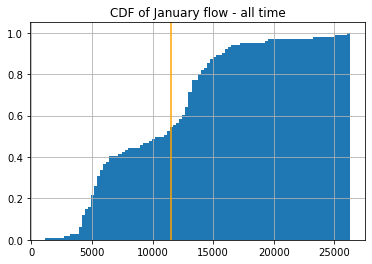

In [30]:
dv_lees.loc[ (dv_lees.month==1)].groupby('year').agg('mean')['Q'].hist(cumulative=True,
                                                                    density=1,
                                                                    bins=100,
                                                                    label='Jan averages')
plt.axvline(trip_jan_q.Q, color='orange')
plt.title('CDF of January flow - all time')

Text(0.5, 1.0, 'CDF of January flow - since 1980')

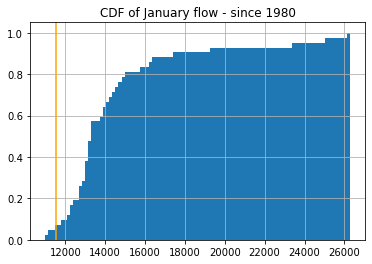

In [31]:
recent=1980
dv_lees.loc[(dv_lees.index.year>recent) & (dv_lees.month==1)].groupby('year').agg('mean')['Q'].hist(cumulative=True,
                                                                    density=1,
                                                                    bins=100,
                                                                    label='Jan averages')
plt.axvline(trip_jan_q.Q, color='orange')
plt.title(f'CDF of January flow - since {recent}')

Text(0.5, 1.0, 'CDF of February flow - all time')

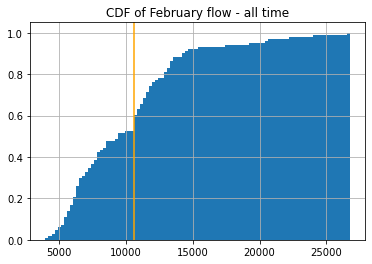

In [32]:
dv_lees.loc[dv_lees.month==2].groupby('year').agg('mean')['Q'].hist(cumulative=True,
                                                                    density=1,
                                                                    bins=100,
                                                                    label='Jan averages')
plt.axvline(trip_feb_q.Q, color='orange')
plt.title(f'CDF of February flow - all time')

Text(0.5, 1.0, 'CDF of February flow - since 1980')

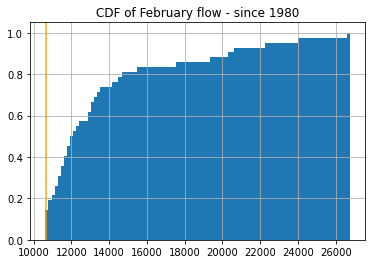

In [33]:
dv_lees.loc[(dv_lees.index.year>recent) & (dv_lees.month==2)].groupby('year').agg('mean')['Q'].hist(cumulative=True,
                                                                    density=1,
                                                                    bins=100,
                                                                    label='Jan averages')
plt.axvline(trip_feb_q.Q, color='orange')
plt.title(f'CDF of February flow - since {recent}')

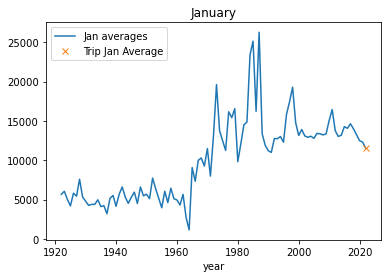

In [34]:
ax = dv_lees.loc[dv_lees.month==1].groupby('year').agg('mean')['Q'].plot(label='Jan averages')
ax.plot([2022],[trip_jan_q], 'x', label='Trip Jan Average')
plt.title('January')
plt.legend()

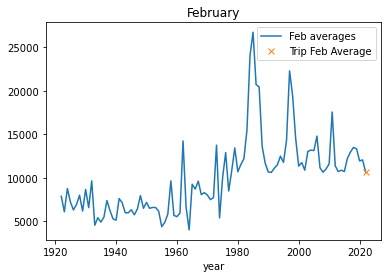

In [35]:
ax = dv_lees.loc[dv_lees.month==2].groupby('year').agg('mean')['Q'].plot(label='Feb averages')
ax.plot([2022],[trip_feb_q], 'x', label='Trip Feb Average')
plt.title('February')
plt.legend()

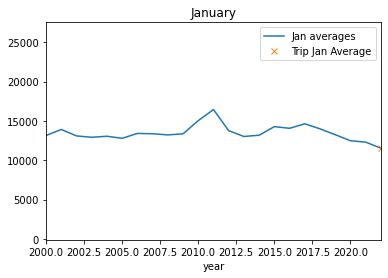

In [36]:
ax = dv_lees.loc[dv_lees.month==1].groupby('year').agg('mean')['Q'].plot(label='Jan averages')
ax.plot([2022],[trip_jan_q], 'x', label='Trip Jan Average')
plt.title('January')
plt.xlim([2000,2022])
plt.legend()

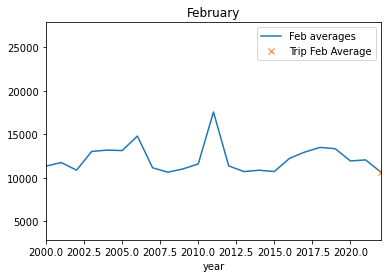

In [37]:
ax = dv_lees.loc[dv_lees.month==2].groupby('year').agg('mean')['Q'].plot(label='Feb averages')
ax.plot([2022],[trip_feb_q], 'x', label='Trip Feb Average')
plt.title('February')
plt.xlim([2000,2022])
plt.legend()

<AxesSubplot:xlabel='year,month'>

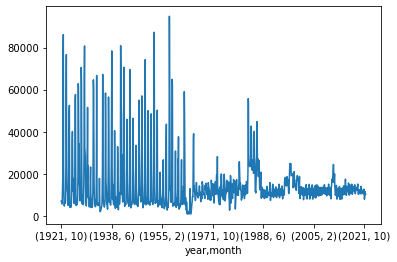

In [38]:
dv_lees.groupby(['year','month'])['Q'].mean().plot()